In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('udemy_courses.csv')

In [3]:
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance


In [4]:
data.dtypes

course_id                int64
course_title            object
url                     object
is_paid                   bool
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
content_duration       float64
published_timestamp     object
subject                 object
dtype: object

In [5]:
data=pd.read_csv('udemy_courses.csv',parse_dates=['published_timestamp'])

In [6]:
data.dtypes

course_id                            int64
course_title                        object
url                                 object
is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [7]:
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [8]:
data.shape

(3678, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   object             
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   object             
dtypes: bool(1), datetime

In [10]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

<Axes: >

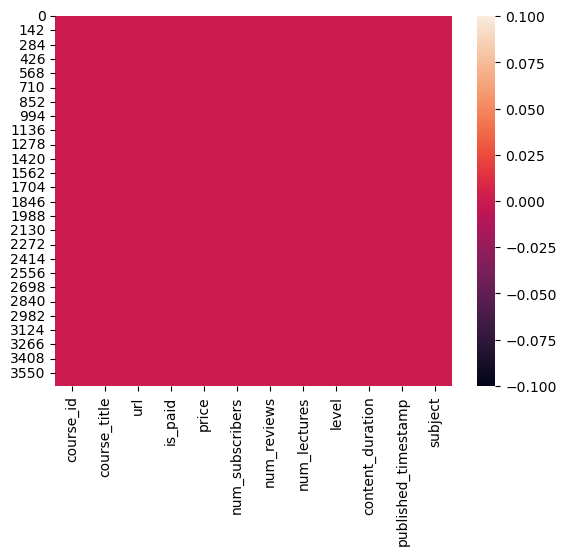

In [11]:
sns.heatmap(data.isnull())

##### Checking for duplicated values

In [12]:
dup=data.duplicated().any()

In [13]:
data[data.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15 14:56:17+00:00,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02 14:29:35+00:00,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03 00:55:31+00:00,Web Development


In [14]:
data.duplicated().any()

True

In [15]:
print('are there any duplicated values in data?: ',dup)

are there any duplicated values in data?:  True


In [16]:
data=data.drop_duplicates()

In [17]:
dup=data.duplicated().any()
print('are there any duplicated values in data?: ',dup)     # Because we dropped duplicate value rows it returns false

are there any duplicated values in data?:  False


##### Find out number of courses per subject

In [18]:
data['subject']

0       Business Finance
1       Business Finance
2       Business Finance
3       Business Finance
4       Business Finance
              ...       
3673     Web Development
3674     Web Development
3675     Web Development
3676     Web Development
3677     Web Development
Name: subject, Length: 3672, dtype: object

In [19]:
data['subject'].value_counts()

Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: subject, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

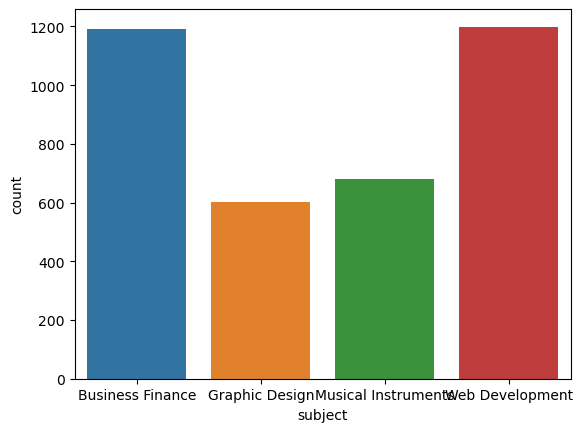

In [20]:
sns.countplot(x=data['subject'],data=data)

<Axes: xlabel='subject', ylabel='count'>

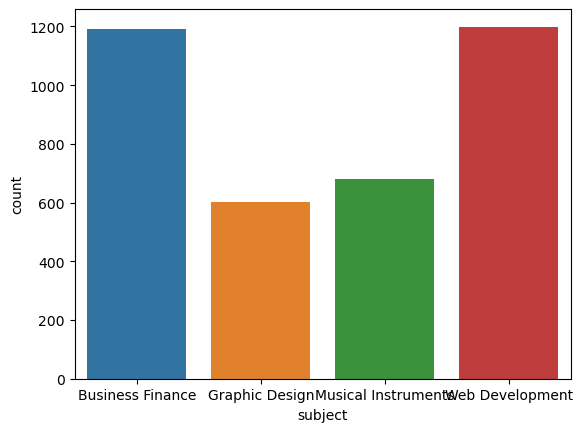

In [21]:
sns.countplot(x=data['subject'],data=data)


Text(0, 0.5, 'number of courses per subject')

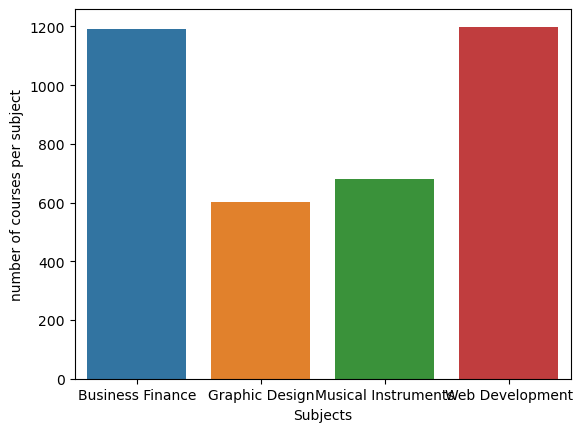

In [22]:
sns.countplot(x=data['subject'],data=data)
plt.xlabel('Subjects')
plt.ylabel('number of courses per subject')

Text(0, 0.5, 'number of courses per subject')

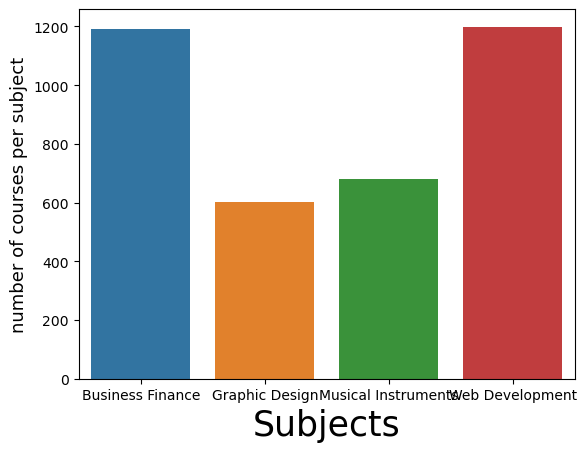

In [23]:
sns.countplot(x=data['subject'],data=data)
plt.xlabel('Subjects',fontsize=25)
plt.ylabel('number of courses per subject',fontsize=13)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Business Finance'),
  Text(1, 0, 'Graphic Design'),
  Text(2, 0, 'Musical Instruments'),
  Text(3, 0, 'Web Development')])

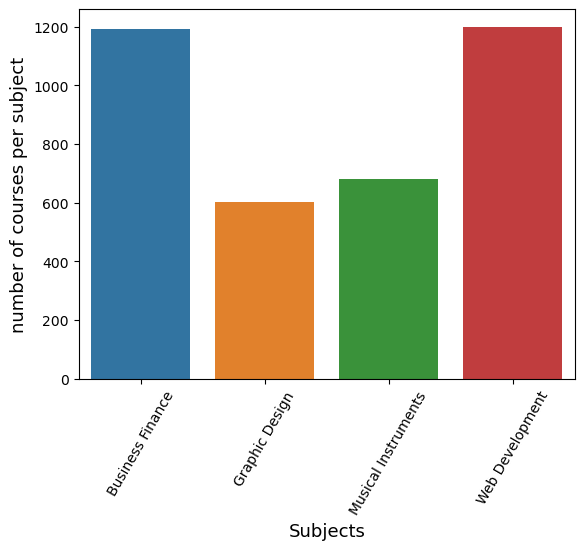

In [24]:
sns.countplot(x=data['subject'],data=data)
plt.xlabel('Subjects',fontsize=13)
plt.ylabel('number of courses per subject',fontsize=13)
plt.xticks(rotation=60)

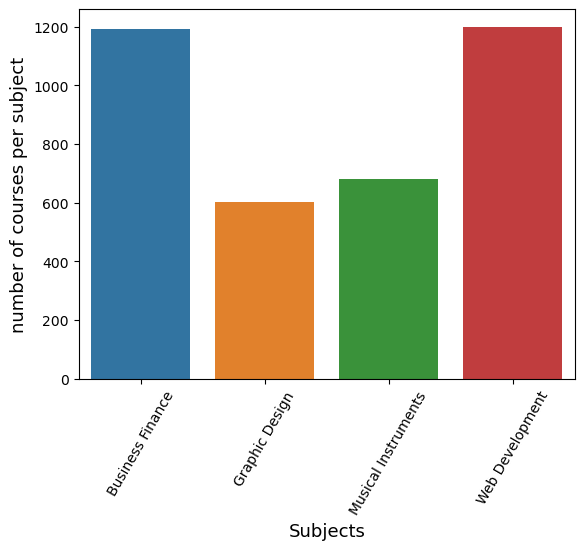

In [25]:
sns.countplot(x=data['subject'],data=data)
plt.xlabel('Subjects',fontsize=13)
plt.ylabel('number of courses per subject',fontsize=13)
plt.xticks(rotation=60)
plt.show()  #This is used to write extraa strings

#### For which levels ,udemy courses providing the courses

In [26]:
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [27]:
data['level']

0               All Levels
1               All Levels
2       Intermediate Level
3               All Levels
4       Intermediate Level
               ...        
3673            All Levels
3674        Beginner Level
3675            All Levels
3676            All Levels
3677        Beginner Level
Name: level, Length: 3672, dtype: object

In [28]:
data['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level'], dtype=object)

In [29]:
data['level'].value_counts()

All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

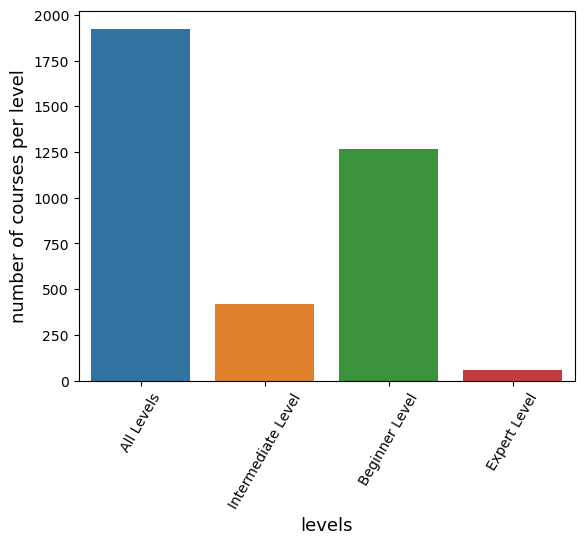

In [30]:
sns.countplot(x=data['level'],data=data)
plt.xlabel('levels',fontsize=13)
plt.ylabel('number of courses per level',fontsize=13)
plt.xticks(rotation=60)
plt.show()

#### Display the count of Paid and Free courses

In [31]:
data.head(1)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance


In [32]:
data['price'].unique()

array([200,  75,  45,  95, 150,  65, 195,  30,  20,  50, 175, 140, 115,
       190, 125,  60, 145, 105, 155, 185, 180, 120,  25, 160,  40,   0,
       100,  90,  35,  80,  70,  55, 165, 130,  85, 170, 110, 135],
      dtype=int64)

In [33]:
data['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

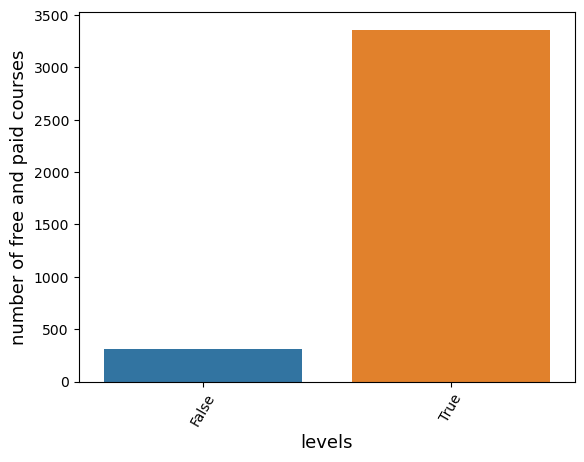

In [34]:
sns.countplot(x=data['is_paid'])
plt.xlabel('levels',fontsize=13)
plt.ylabel('number of free and paid courses',fontsize=13)
plt.xticks(rotation=60)
plt.show()

#### Which course has more lectures(Free or Paid)?

In [35]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [36]:
data.groupby('is_paid')['num_lectures'].mean()

is_paid
False    21.416129
True     41.866746
Name: num_lectures, dtype: float64

#### Whoch courses have a higehr number of subscribers Free or Paid

In [37]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [38]:
data['num_subscribers']

0       2147
1       2792
2       2174
3       2451
4       1276
        ... 
3673    1040
3674     306
3675     513
3676     300
3677     901
Name: num_subscribers, Length: 3672, dtype: int64

In [39]:
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [40]:
data['is_paid'].value_counts()

True     3362
False     310
Name: is_paid, dtype: int64

In [41]:
data['num_subscribers'].value_counts()

0       65
1       49
5       28
2       27
3       26
        ..
6428     1
4449     1
6039     1
1522     1
901      1
Name: num_subscribers, Length: 2197, dtype: int64

In [42]:
data[data['num_subscribers']==0]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
453,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16 18:28:30+00:00,Business Finance
454,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23 16:19:01+00:00,Business Finance
455,1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.500000,2017-07-06 21:46:30+00:00,Business Finance
456,1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2.000000,2017-07-03 21:40:32+00:00,Business Finance
457,1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2.000000,2017-06-29 22:01:56+00:00,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
2402,1214670,Tune that Sour Note on Your Piano,https://www.udemy.com/how-to-tune-your-own-piano/,True,20,0,0,6,All Levels,0.550000,2017-06-20 21:46:40+00:00,Musical Instruments
2403,1272282,Learn Vikings Soundtracks on the Piano by Ear,https://www.udemy.com/learn-vikings-soundtrack...,True,20,0,0,8,All Levels,0.583333,2017-06-29 15:10:58+00:00,Musical Instruments
2404,1224186,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,True,35,0,0,13,Beginner Level,0.516667,2017-05-30 00:19:02+00:00,Musical Instruments
2405,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,https://www.udemy.com/abrsm-grade-iii-piano-cl...,True,20,0,0,5,Beginner Level,0.516667,2017-07-06 16:12:34+00:00,Musical Instruments


In [43]:
data[data['num_subscribers']==1]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
405,1249164,Corporate Internal Controls and Fraud Controls,https://www.udemy.com/corporate-internal-contr...,True,50,1,0,12,Intermediate Level,2.000000,2017-06-29 17:27:52+00:00,Business Finance
415,1208148,Coaching Course:Investment Analysis for your c...,https://www.udemy.com/coaching-courseinvestmen...,True,200,1,0,6,Intermediate Level,0.566667,2017-06-23 16:35:04+00:00,Business Finance
517,782256,FMT: Forex Market Trader Certificate,https://www.udemy.com/fmtcertificate/,True,20,1,0,27,All Levels,2.000000,2016-03-17 17:43:59+00:00,Business Finance
518,826912,Six Stage Negotiation,https://www.udemy.com/six-stage-negotiation-fo...,True,30,1,0,21,All Levels,2.500000,2016-05-11 17:08:03+00:00,Business Finance
520,759262,Decide whether to Invest in a Business,https://www.udemy.com/decide-whether-to-invest...,True,20,1,0,43,Beginner Level,1.000000,2016-02-15 17:33:49+00:00,Business Finance
522,591724,Financial Market Environment & Investment Stra...,https://www.udemy.com/financial-market-environ...,True,105,1,0,25,All Levels,1.500000,2017-06-20 02:29:09+00:00,Business Finance
523,533458,How to Obtain a Business Loan,https://www.udemy.com/how-to-obtain-a-business...,True,20,1,1,12,All Levels,0.566667,2015-11-17 19:17:56+00:00,Business Finance
574,1232382,Intro to Financial Statement Audits,https://www.udemy.com/intro-financial-statemen...,True,50,1,0,9,Intermediate Level,1.500000,2017-06-29 18:09:01+00:00,Business Finance
584,1165780,Ratio analysis for bankers and credit analysts,https://www.udemy.com/ratio-analysis-for-banke...,True,20,1,0,13,Beginner Level,3.000000,2017-04-12 16:55:26+00:00,Business Finance
638,1276364,Bitcoin & Ethereum Course (2 Course Bundle),https://www.udemy.com/bitcoin-ethereum-bundle/,True,200,1,0,52,All Levels,2.500000,2017-07-05 19:06:26+00:00,Business Finance


In [44]:
#### Which courses have a higher number of subscribers Free or Paid

In [45]:
data.groupby('is_paid')['num_subscribers'].mean()

is_paid
False    11533.951613
True      2421.270077
Name: num_subscribers, dtype: float64

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

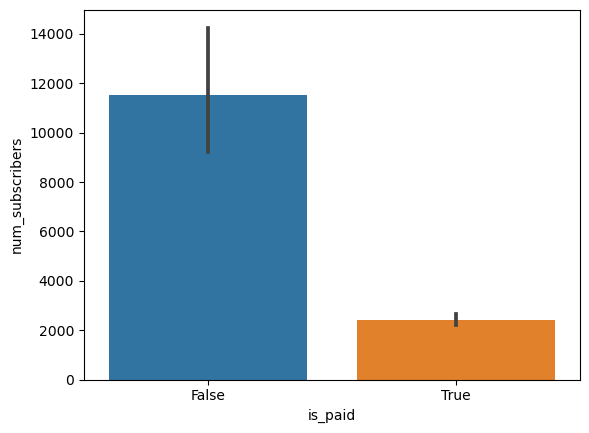

In [46]:
sns.barplot(x='is_paid',y='num_subscribers',data=data)

##### Which level has the highest number of subscribers

In [47]:
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [48]:
data.groupby('level')['num_subscribers']

In [49]:
data.groupby('level')['num_subscribers'].mean()

level
All Levels            3569.761558
Beginner Level        3195.459779
Expert Level           865.448276
Intermediate Level    1762.482185
Name: num_subscribers, dtype: float64

<Axes: xlabel='level', ylabel='num_subscribers'>

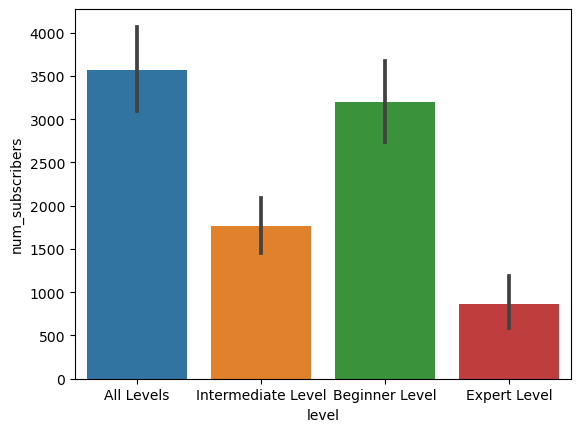

In [50]:
sns.barplot(x='level',y='num_subscribers',data=data)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'All Levels'),
  Text(1, 0, 'Intermediate Level'),
  Text(2, 0, 'Beginner Level'),
  Text(3, 0, 'Expert Level')])

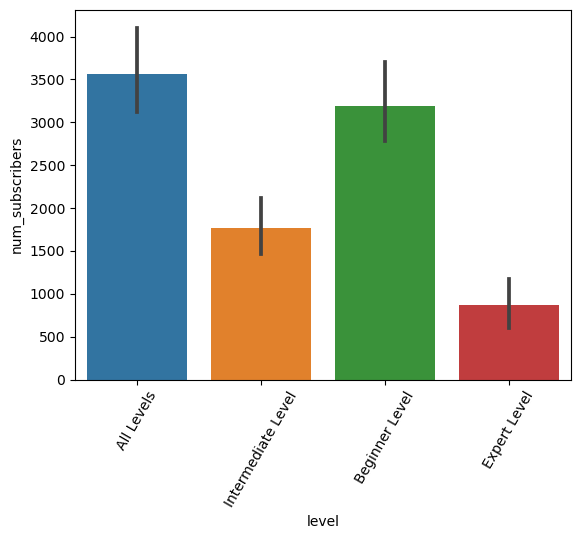

In [51]:
sns.barplot(x='level',y='num_subscribers',data=data)
plt.xticks(rotation=60)

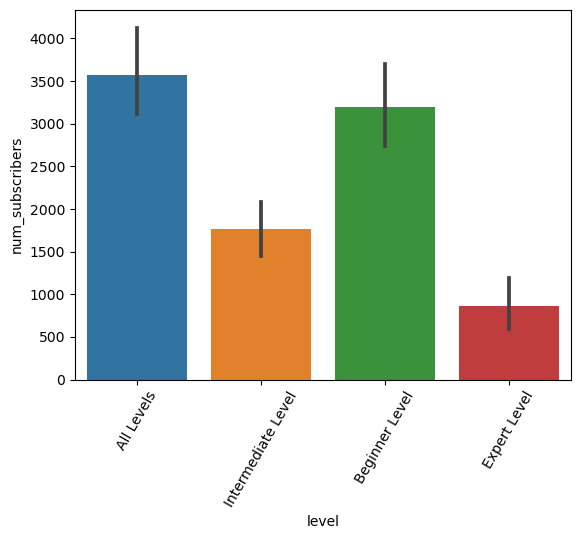

In [52]:
sns.barplot(x='level',y='num_subscribers',data=data)
plt.xticks(rotation=60)
plt.show()

##### Find most popular course title

In [53]:
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [54]:
data['num_subscribers'].max()

268923

In [55]:
data['num_subscribers']==data['num_subscribers'].max()

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: num_subscribers, Length: 3672, dtype: bool

In [56]:
data[data['num_subscribers']==data['num_subscribers'].max()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development


In [57]:
data[data['num_subscribers']==data['num_subscribers'].max()]['course_title']

2827    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

#### Display 10 Most Popular Courses as per number of subscribers

In [58]:
data.sort_values(by='num_subscribers',ascending=False)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.500000,2013-02-14 07:03:41+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.500000,2013-06-09 15:51:55+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.000000,2015-11-02 21:13:27+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.000000,2014-04-08 16:21:30+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.500000,2016-03-08 22:28:36+00:00,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
1234,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15 21:48:55+00:00,Graphic Design
886,1087466,Stop Creditors from Harassing you and Avoid Ba...,https://www.udemy.com/stop-creditor-harassment...,True,20,0,0,7,Beginner Level,0.616667,2017-02-02 16:22:37+00:00,Business Finance
887,1058852,Learn to trade using technical analysis,https://www.udemy.com/learn-to-trade-using-tec...,True,50,0,0,6,Intermediate Level,0.533333,2017-05-02 13:15:53+00:00,Business Finance
888,1083744,How to Invest Using ETFs from Former Wall Stre...,https://www.udemy.com/etf-master-class/,True,200,0,0,10,All Levels,2.000000,2017-02-15 22:34:00+00:00,Business Finance


In [59]:
data.sort_values(by='num_subscribers',ascending=False).head(10)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15 17:00:33+00:00,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10 15:19:29+00:00,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12 23:19:54+00:00,Web Development


In [60]:
data.sort_values(by='num_subscribers',ascending=False).head(10)['course_title']

2827                 Learn HTML5 Programming From Scratch
3032                       Coding for Entrepreneurs Basic
3230                           The Web Developer Bootcamp
2783    Build Your First Website in 1 Week with HTML5 ...
3232                The Complete Web Developer Course 2.0
1896                Free Beginner Electric Guitar Lessons
2589    Web Design for Web Developers: Build Beautiful...
2619               Learn Javascript & JQuery From Scratch
3289    Practical PHP: Master the Basics and Code Dyna...
3247            JavaScript: Understanding the Weird Parts
Name: course_title, dtype: object

In [61]:
top_10=data.sort_values(by='num_subscribers',ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

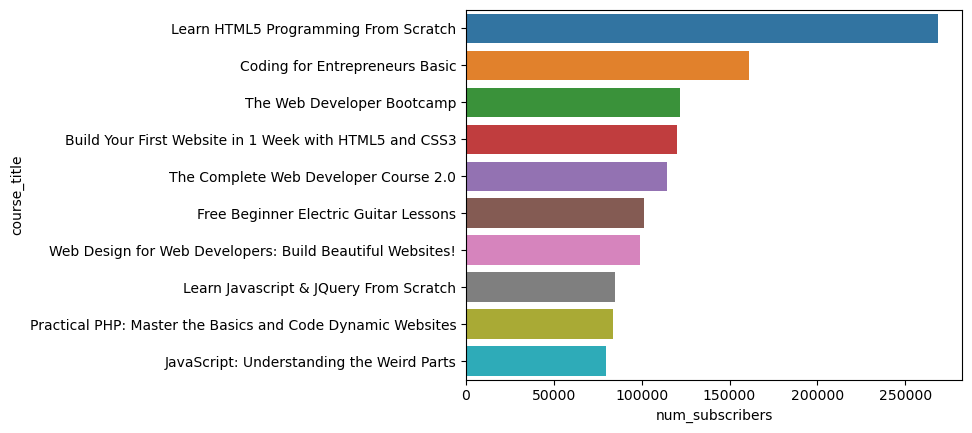

In [62]:
sns.barplot(y='course_title',x='num_subscribers',data=top_10)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Learn HTML5 Programming From Scratch'),
  Text(1, 0, 'Coding for Entrepreneurs Basic'),
  Text(2, 0, 'The Web Developer Bootcamp'),
  Text(3, 0, 'Build Your First Website in 1 Week with HTML5 and CSS3'),
  Text(4, 0, 'The Complete Web Developer Course 2.0'),
  Text(5, 0, 'Free Beginner Electric Guitar Lessons'),
  Text(6, 0, 'Web Design for Web Developers: Build Beautiful Websites!'),
  Text(7, 0, 'Learn Javascript & JQuery From Scratch'),
  Text(8, 0, 'Practical PHP: Master the Basics and Code Dynamic Websites'),
  Text(9, 0, 'JavaScript: Understanding the Weird Parts')])

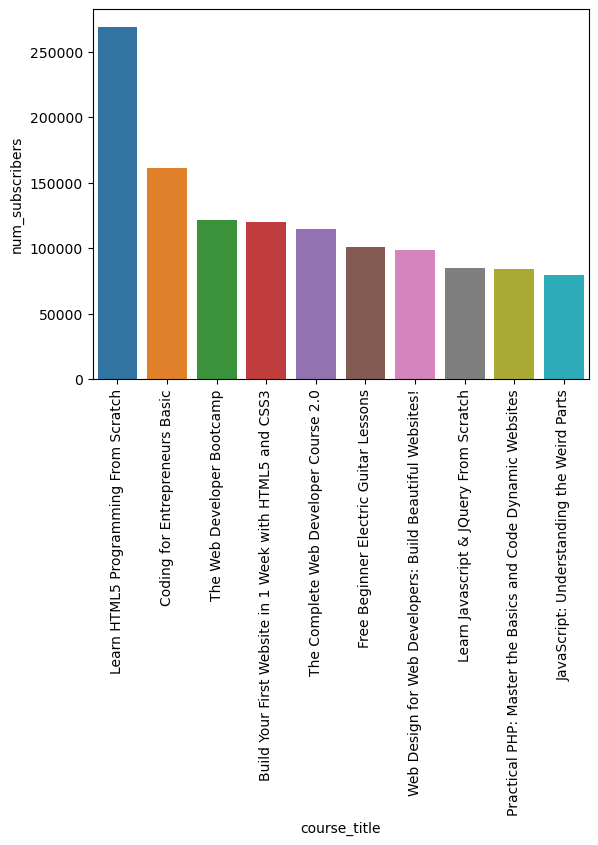

In [63]:
sns.barplot(x='course_title',y='num_subscribers',data=top_10)
plt.xticks(rotation=90)

<function matplotlib.pyplot.show(close=None, block=None)>

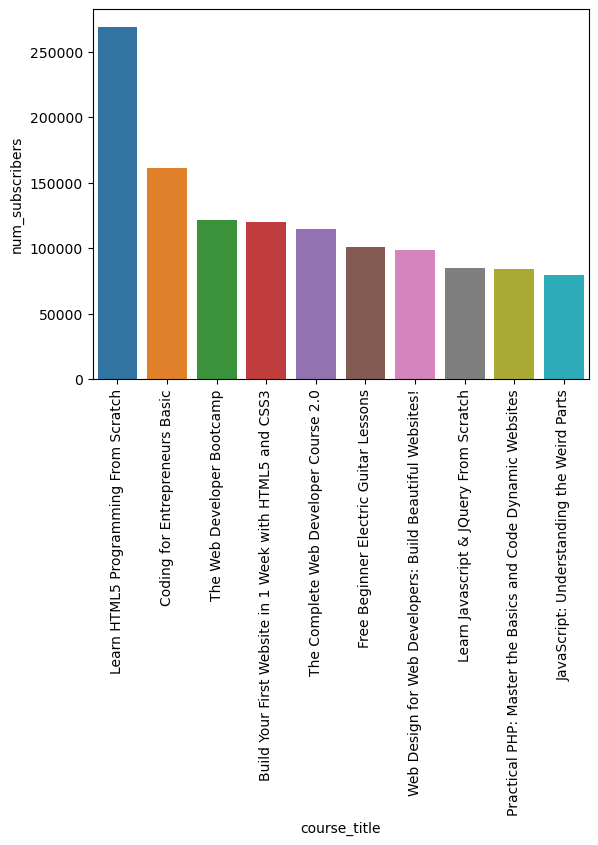

In [64]:
sns.barplot(x='course_title',y='num_subscribers',data=top_10)
plt.xticks(rotation=90)
plt.show

#### Find the subject which is having the highest number of Reviews

In [65]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [66]:
data.groupby('subject')['num_reviews']

In [67]:
data.groupby('subject')['num_reviews'].mean()

subject
Business Finance        63.729639
Graphic Design          61.578073
Musical Instruments     46.652941
Web Development        358.215179
Name: num_reviews, dtype: float64

<Axes: xlabel='subject', ylabel='num_reviews'>

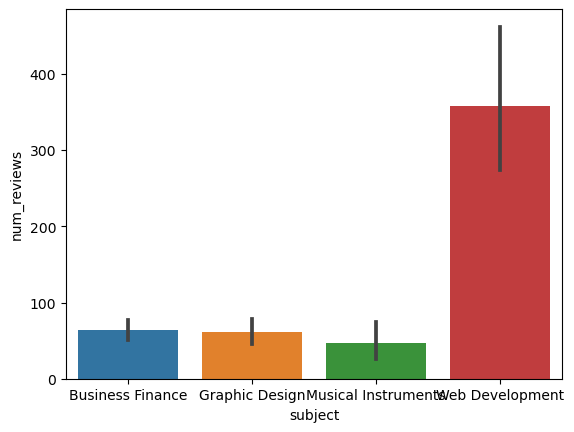

In [68]:
sns.barplot(x='subject',y='num_reviews',data=data)

<Axes: xlabel='num_reviews', ylabel='subject'>

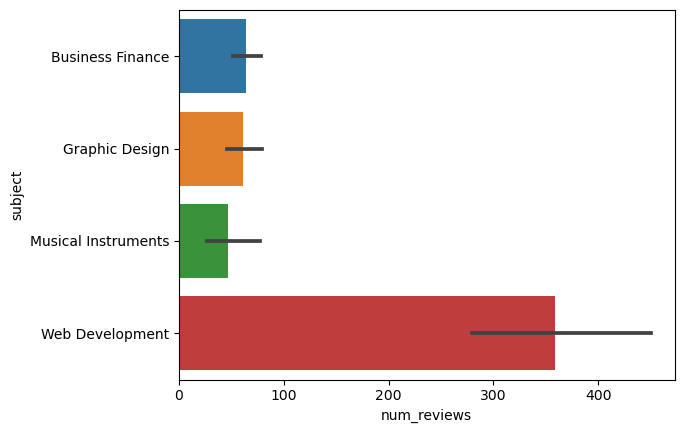

In [69]:
sns.barplot(y='subject',x='num_reviews',data=data)

#### Does price effect number of reviews

In [70]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

<Axes: xlabel='price', ylabel='num_reviews'>

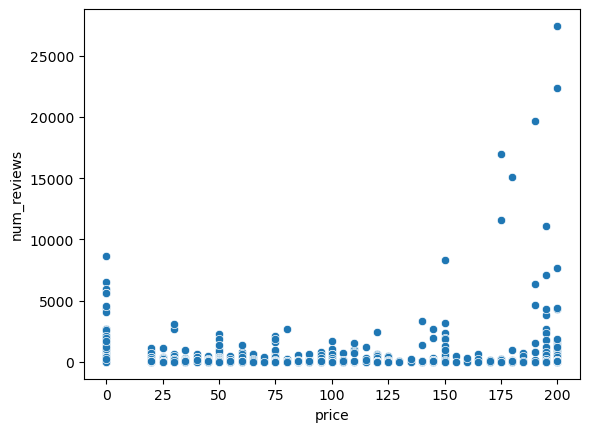

In [71]:
sns.scatterplot(y='num_reviews',x='price',data=data)

<Axes: xlabel='price', ylabel='num_reviews'>

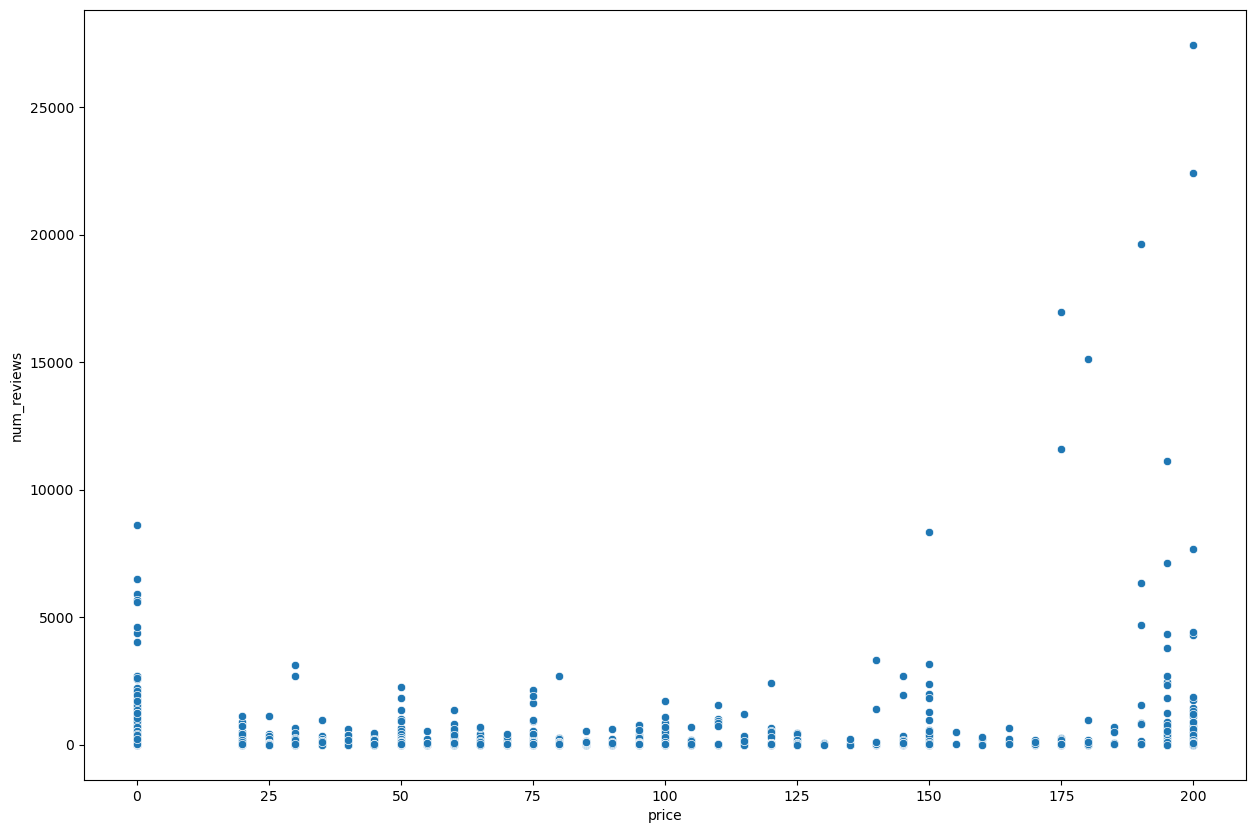

In [72]:
plt.figure(figsize=(15,10))
sns.scatterplot(y='num_reviews',x='price',data=data)

##### Find total number of courses related to python

In [73]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [74]:
data['course_title'].str.contains('python',case=False)

0       False
1       False
2       False
3       False
4       False
        ...  
3673    False
3674    False
3675    False
3676    False
3677    False
Name: course_title, Length: 3672, dtype: bool

In [75]:
data[data['course_title'].str.contains('python',case=False)]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28 16:41:44+00:00,Business Finance
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5,2017-05-28 23:41:03+00:00,Business Finance
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5,2017-03-30 22:17:09+00:00,Business Finance
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3.0,2017-03-14 00:39:45+00:00,Business Finance
334,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8.0,2016-04-12 00:40:03+00:00,Business Finance
536,529828,Python for Trading & Investing,https://www.udemy.com/python-for-trading-inves...,True,95,638,25,36,All Levels,5.0,2015-06-17 22:23:31+00:00,Business Finance
762,1088656,Quantitative Trading Analysis with Python,https://www.udemy.com/quantitative-trading-ana...,True,50,256,17,49,All Levels,5.5,2017-01-27 17:11:28+00:00,Business Finance
863,902888,Investment Portfolio Analysis with Python,https://www.udemy.com/investment-portfolio-ana...,True,50,209,13,37,All Levels,7.0,2016-07-13 21:40:32+00:00,Business Finance
1682,546848,Learn to code in Python and learn Adobe Photos...,https://www.udemy.com/learn-to-code-in-python-...,True,50,1132,1,29,All Levels,2.0,2015-07-08 00:15:12+00:00,Graphic Design
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development


In [76]:
sum(data['course_title'].str.contains('python',case=False))

29

#### Display 10 most popular python courses as per number of subscribers

In [77]:
top_10=data[data['course_title'].str.contains('python',case=False)].head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

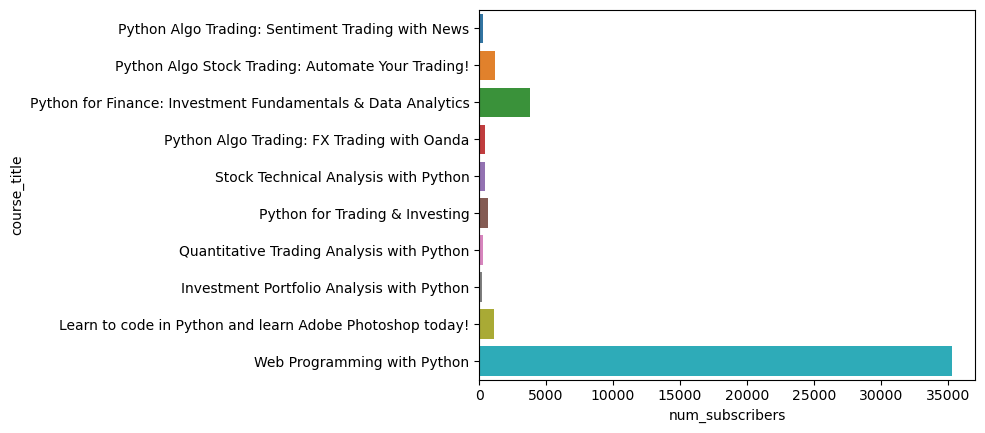

In [78]:
sns.barplot(x='num_subscribers',y='course_title',data=top_10)

In [79]:
data[data['course_title'].str.contains('python',case=False)].sort_values(by='num_subscribers',ascending=False)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2497,16646,Web Programming with Python,https://www.udemy.com/web-programming-with-pyt...,True,50,35267,217,53,All Levels,4.0,2012-04-25 00:01:43+00:00,Web Development
2570,47963,"Coding for Entrepreneurs: Learn Python, Django...",https://www.udemy.com/coding-for-entrepreneurs/,True,195,23412,799,251,All Levels,45.0,2013-04-08 00:46:14+00:00,Web Development
2528,391546,Learn Python and Django: Payment Processing,https://www.udemy.com/learn-django-code-accept...,True,70,17714,198,23,All Levels,3.5,2015-02-09 15:37:56+00:00,Web Development
3200,822444,Python and Django Full Stack Web Developer Boo...,https://www.udemy.com/python-and-django-full-s...,True,200,11832,1883,191,All Levels,31.5,2017-02-24 18:40:55+00:00,Web Development
3507,394832,Fun and creative web engineering with Python a...,https://www.udemy.com/web-engineering-with-pyt...,False,0,10917,319,25,All Levels,2.0,2015-06-09 19:51:50+00:00,Web Development
2553,938560,The Complete Ethical Hacking Course 2.0: Pytho...,https://www.udemy.com/penetration-testing-ethi...,True,195,7827,268,66,All Levels,11.0,2016-09-26 15:08:29+00:00,Web Development
3138,631128,Complete Python Web Course: Build 8 Python Web...,https://www.udemy.com/the-complete-python-web-...,True,110,7489,941,173,All Levels,16.0,2015-11-08 20:57:35+00:00,Web Development
3197,76052,Try Django 1.9 | Build a Blog and Learn Python...,https://www.udemy.com/try-django/,True,50,7407,172,147,All Levels,20.0,2014-03-04 07:12:21+00:00,Web Development
2681,477702,Python for Beginners: Python Programming Langu...,https://www.udemy.com/python-course/,True,150,6153,125,84,Beginner Level,5.0,2015-06-14 18:18:57+00:00,Web Development
3203,970600,REST APIs with Flask and Python,https://www.udemy.com/rest-api-flask-and-python/,True,110,5151,737,115,Intermediate Level,12.5,2016-11-06 19:00:38+00:00,Web Development


In [80]:
top_10=data[data['course_title'].str.contains('python',case=False)].sort_values(by='num_subscribers',ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

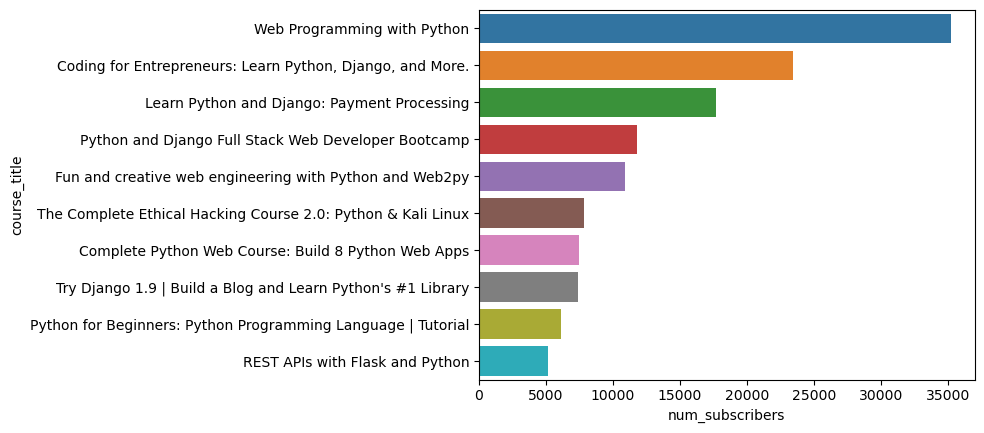

In [81]:
sns.barplot(x='num_subscribers',y='course_title',data=top_10)

##### In which year highest number of courses were posted?

In [82]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [83]:
data['published_timestamp']

0      2017-01-18 20:58:58+00:00
1      2017-03-09 16:34:20+00:00
2      2016-12-19 19:26:30+00:00
3      2017-05-30 20:07:24+00:00
4      2016-12-13 14:57:18+00:00
                  ...           
3673   2016-06-14 17:36:46+00:00
3674   2017-03-10 22:24:30+00:00
3675   2015-12-30 16:41:42+00:00
3676   2016-08-11 19:06:15+00:00
3677   2014-09-28 19:51:11+00:00
Name: published_timestamp, Length: 3672, dtype: datetime64[ns, UTC]

In [84]:
data['year']=data['published_timestamp'].dt.year

In [85]:
data.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


In [86]:
data['year'].unique()

array([2017, 2016, 2014, 2015, 2013, 2012, 2011], dtype=int64)

In [87]:
######## In which year highest number of courses were posted?
data['year'].value_counts()

2016    1204
2015    1014
2017     713
2014     490
2013     201
2012      45
2011       5
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

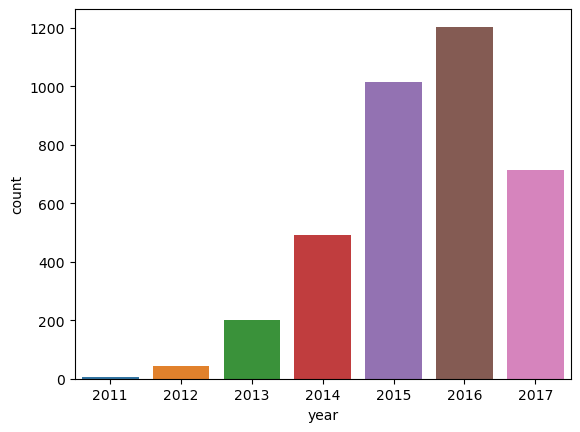

In [88]:
sns.countplot(x=data['year'],data=data)

#### Display category-wise count of posted subjects

In [89]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year'],
      dtype='object')

<Axes: xlabel='subject', ylabel='count'>

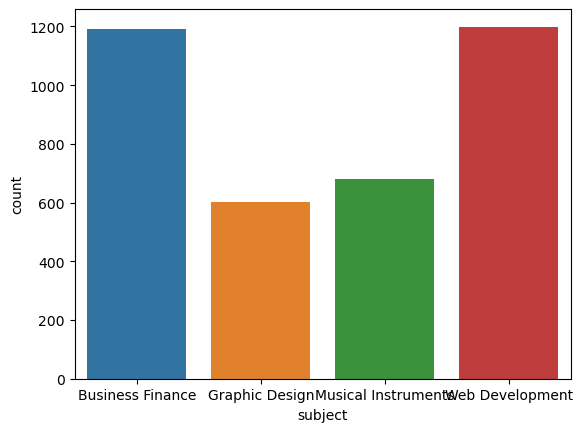

In [90]:
sns.countplot(x='subject',data=data)

#### Display category-wise count of posted subjects [year wise]

In [91]:
data.groupby('year')['subject']

In [92]:
data.groupby('year')['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: subject, dtype: int64